_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión

# AUTOR: Miguel Ángel Navarro Arenas


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
## cargar el dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
## ¿cuántas instancias tiene el dataset?
num_instancias = df.shape[0]
num_instancias

9471

In [5]:
## ¿cuál es el tipo de datos de cada una de las columnas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


<h2>Vamos a eliminar las columnas Unnamed que tienen todos los valores a NaN. </h2>
<h3>Durante la resolución de la actividad, las columnas Date y Time han sido eliminadas, ya que causaban problemas y, además, no aportan nada al modelo de información relevante. </h3>
<p>Como no estamos tratando con series temporales ni nada por el estilo, por lo general, no son necesarios y no aportan nada  a nuestro estudio. </p>

In [6]:
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


<p>Como podemos observar, hay varias filas que tienen en alguna de sus columnas valores nulos. Esto lo podemos observar porque el dataset de entrada tiene un total de 9471 entradas y todas las columnas tienen 9357 filas de tipo no nulo. Esto nos hace indicar que hay algunas filas que tienen los valores a nulos en algunas de las columnas. Lo ideal sería que sea toda la fila la que contuviera esos valores nulos, porque así la eliminaríamos entera, pero puede que no sea así, por lo que vamos a hacer una comprobación previa para ver si esto se cumple. Esto lo hacemos a la hora de hacer el dropna, con el parámetro how al valor 'all'.</p>

In [8]:
# Eliminar las filas que tienen todos los valores nulos
df = df.dropna(how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [9]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
continuous_columns = df.select_dtypes(include=[np.number]).columns

num_categorical = len(categorical_columns)

print(f'Columnas categóricas: {num_categorical}')

Columnas categóricas: 7


In [11]:
num_continuous = len(continuous_columns)
print(f'Columnas continuas: {num_continuous}')

Columnas continuas: 8


In [12]:
print(categorical_columns)

Index(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH'], dtype='object')


In [13]:
print(continuous_columns)

Index(['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
       'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'],
      dtype='object')


In [14]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


<p>Podemos observar como varias columnas, como por ejemplo CO(GT) o C6H6(GT), están siendo interpretadas como objets (categorías), pero esto es debido a que no están siendo tratadas de manera adecuada, estas columnas deberían ser float, pero están separando la parte entera y la decimal por una coma, cuando la codificación natural en python de estas variables es con un punto. Por tanto, vamos a hacer el casteo de estas variables a su tipo correspondiende de manera adecuadad.</p>

In [16]:
# Reemplazar comas por puntos y convertir a float
columns_to_convert = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

for col in columns_to_convert:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Verificar la conversión
df[columns_to_convert].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   C6H6(GT)  9357 non-null   float64
 2   T         9357 non-null   float64
 3   RH        9357 non-null   float64
 4   AH        9357 non-null   float64
dtypes: float64(5)
memory usage: 438.6 KB


In [17]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns
continuous_columns = df.select_dtypes(include=[np.number]).columns

In [20]:
## ¿existen valores nulos en el dataset?

In [21]:
num_valores_nulos = df.isnull().sum()
print(num_valores_nulos)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


_indica aquí tu respuesta_

In [22]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

<p>Para llegar a la variable respuesta, debemos mirar todas las variables que tenemos, así como la documentación de la web donde hemos extraido el dataset, e ir un poco más allá. Según la documentación de donde proviene el dataset, no indica de manera clara cuál es la variable objetivo. Aunque, teniendo en cuenta su información y que en sus datos se mide la calidad del aire y, por tanto, nosotros queremos predecir la calidad del aire, la variable que mejor cumple estas condiciones es NO2, que es un buen indicador de los niveles de polución o calidad en el aire. El dióxido de nitrógeno o NO2 se origina principalmente por la polución producida por los vehículos y las industrias y es un contaminante atmosférico clave. De hecho, mirando noticias como la siguiente de Cadena SER: "https://cadenaser.com/cmadrid/2025/01/02/madrid-cierra-2024-con-los-mejores-datos-de-calidad-del-aire-de-su-historia-radio-madrid/?utm_source=chatgpt.com", podemos observar como la calidad del aire para la ciudad de Madrid en el año 2024 se mide con respecto a los niveles de NO2. </p>
<br>
<p>También, vamos a proporcionar un anexo a este proyecto, en el cual haremos un análisis con regresión sobre dos posibles soluciones: tratar los benzenos como variable objetivo (ya que también son un muy buen indicador de la calidad del aire) y hacer feature engineering para determinar la calidad del aire en una nueva variable objetivo que produciremos artificialmente en base a ciertos parámetros que mencionaremos en esa parte. Esto lo haremos para mostrar que en algunas ocasiones un mismo problema se puede solucionar de maneras distintas.</p>

In [23]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

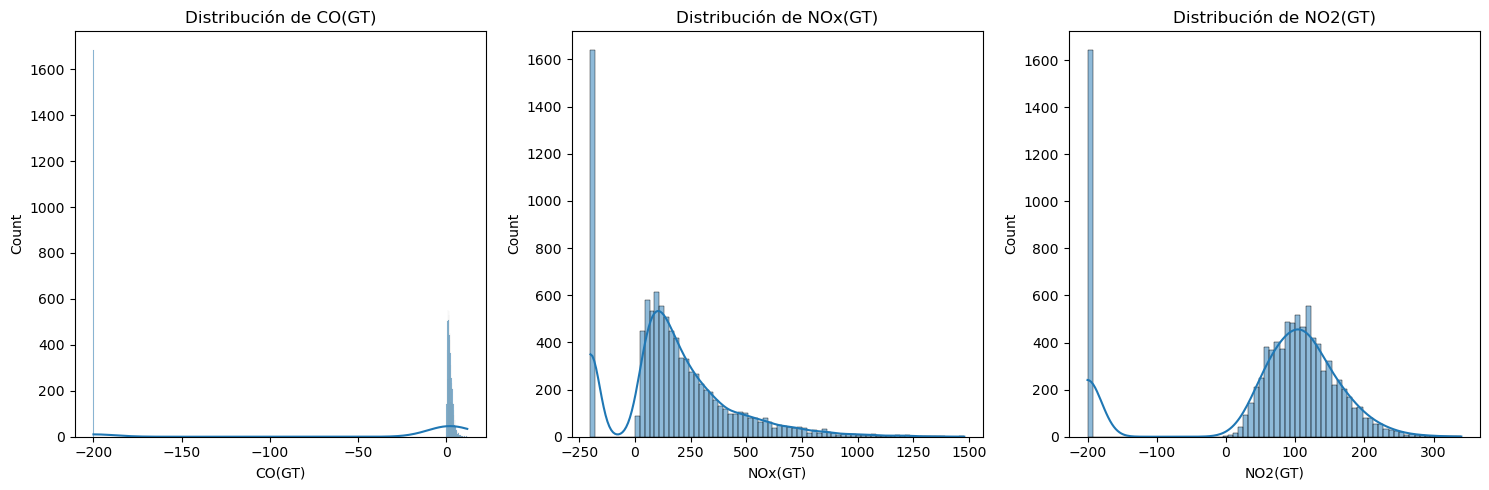

In [24]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['CO(GT)'].dropna(), kde=True)
plt.title('Distribución de CO(GT)')

plt.subplot(1, 3, 2)
sns.histplot(df['NOx(GT)'].dropna(), kde=True)
plt.title('Distribución de NOx(GT)')

plt.subplot(1, 3, 3)
sns.histplot(df['NO2(GT)'].dropna(), kde=True)
plt.title('Distribución de NO2(GT)')

plt.tight_layout()
plt.show()

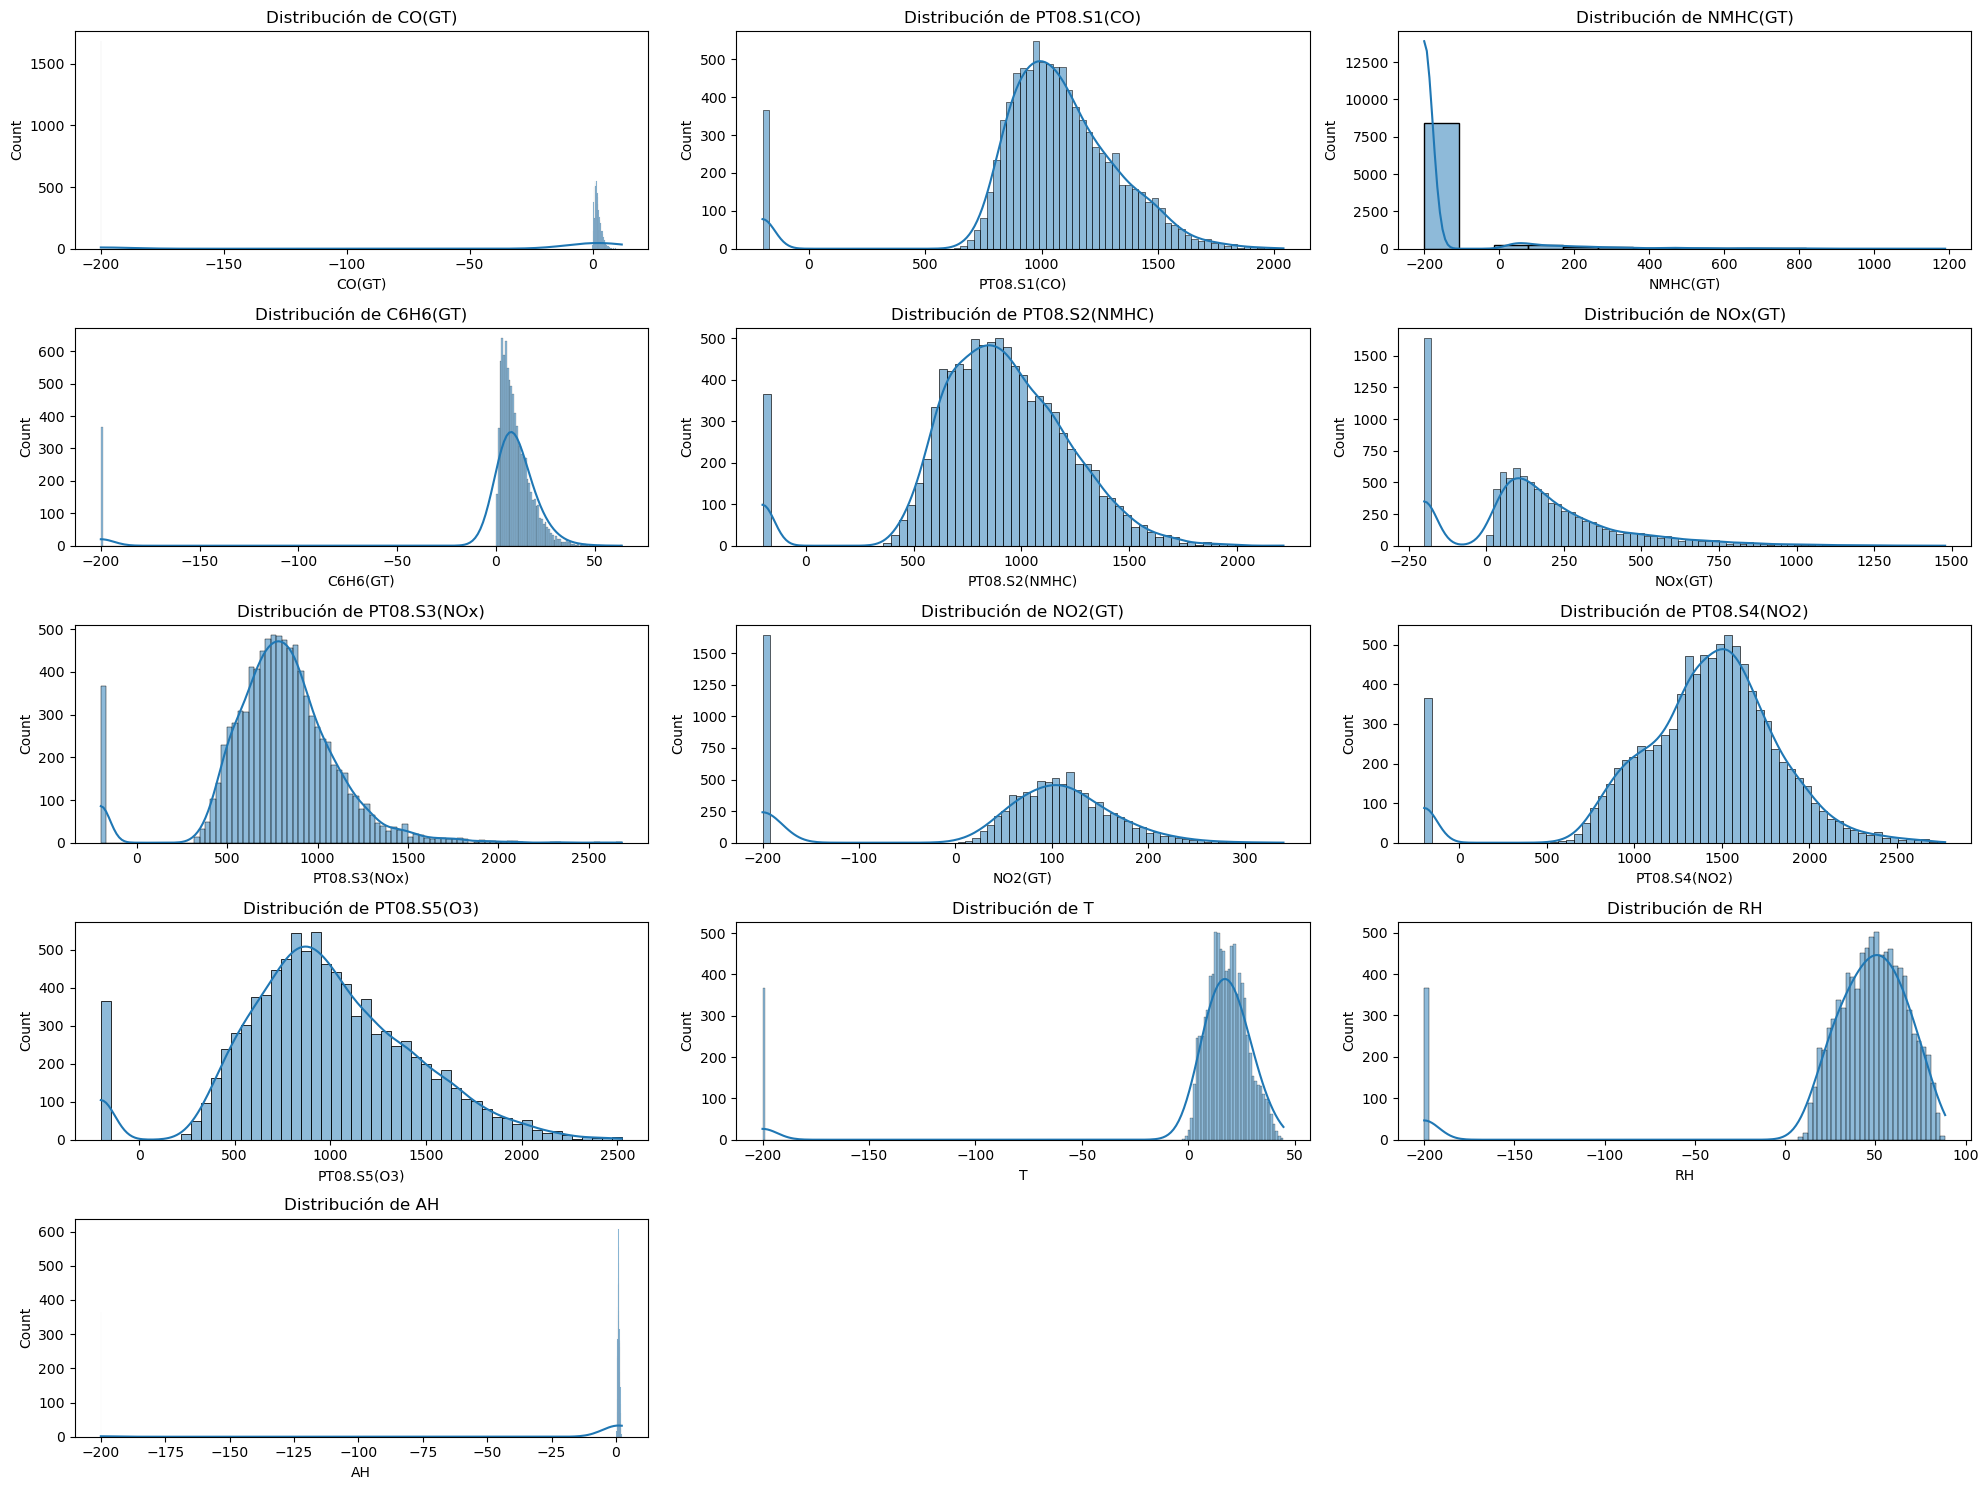

In [25]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

<p>Casi que todas las distribuciones en las variables numéricas suelen ser normales, con algunas variaciones hacia alguno de los lados, principalmente la izquierda. Esto se debe principalmente a que hay demasiados datos anómalos o faltantes. Si observamos el paper de donde nos viene el dataset, en la información, observamos que los valores faltantes están etiquetados con -200. Esto puede ser debido a que durante la toma de datos se han detectado de manera errónea las partículas. Esto es algo muy común y que suele pasar frecuentemente, ya que los dispositivos que se encargan de la captura pueden no ser perfectos.</p>

<p></p>

In [26]:
# Reemplazar los valores -200 con NaN
df.replace(-200, np.nan, inplace=True)

# Guardar el dataset procesado en un nuevo archivo
df.to_csv('AirQualityUCI_procesado_nan.csv', sep=';', index=False)

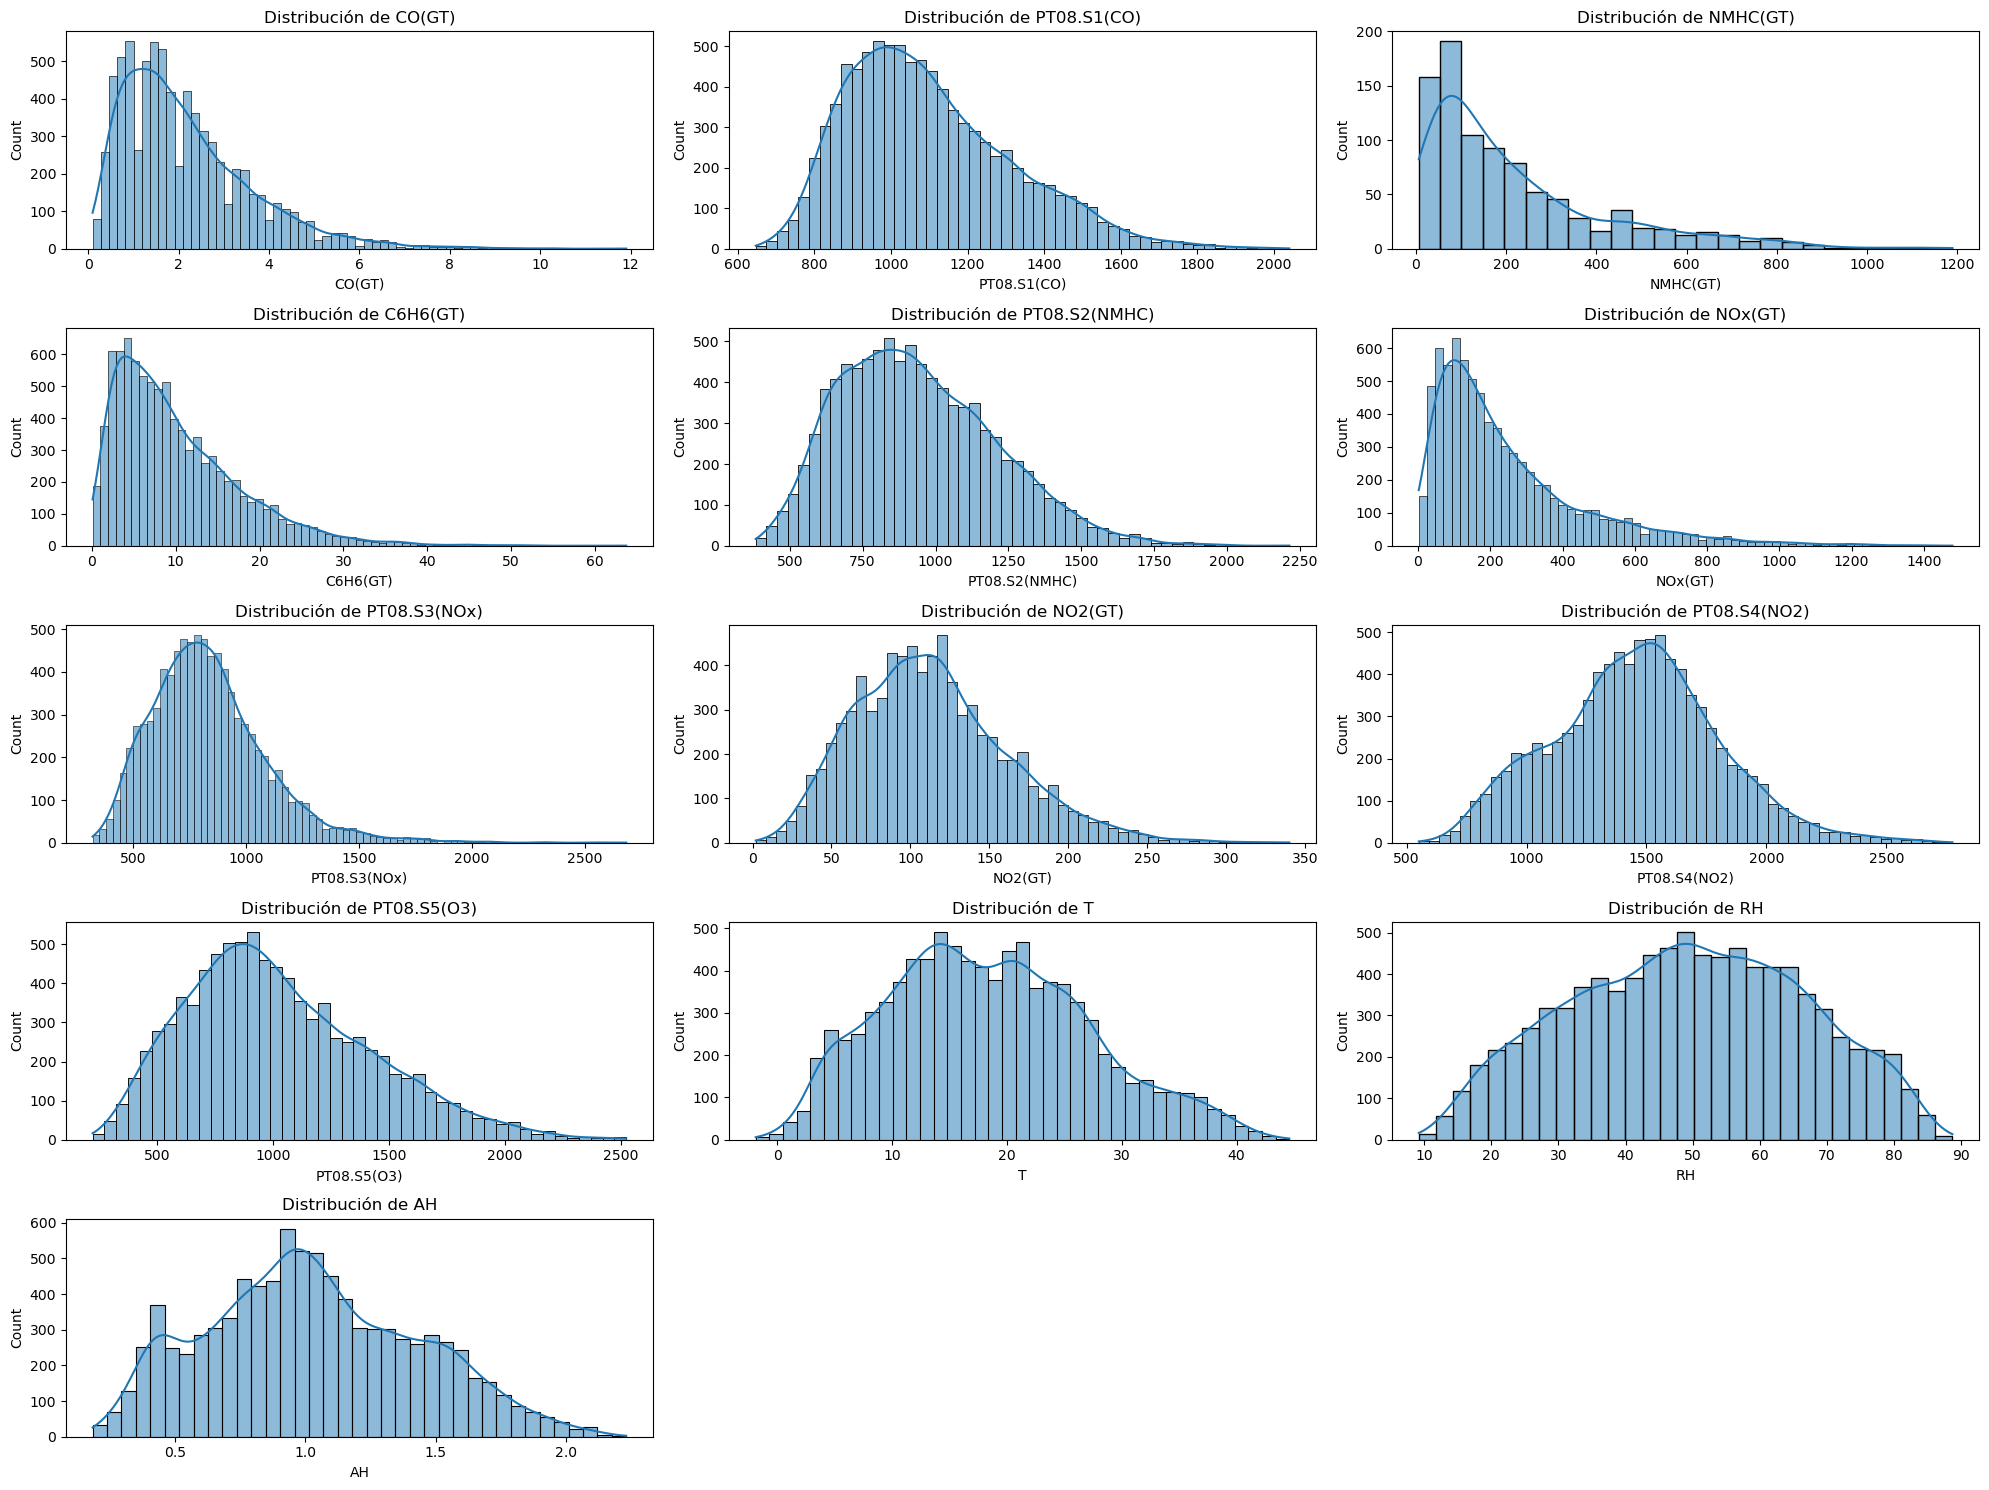

In [27]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

<p>Ahora, vamos a tratar los posibles outliers que tengan nuestros datos, esto lo visualizaremos con un gráfico de cajas y bigotes por cada variable.</p>

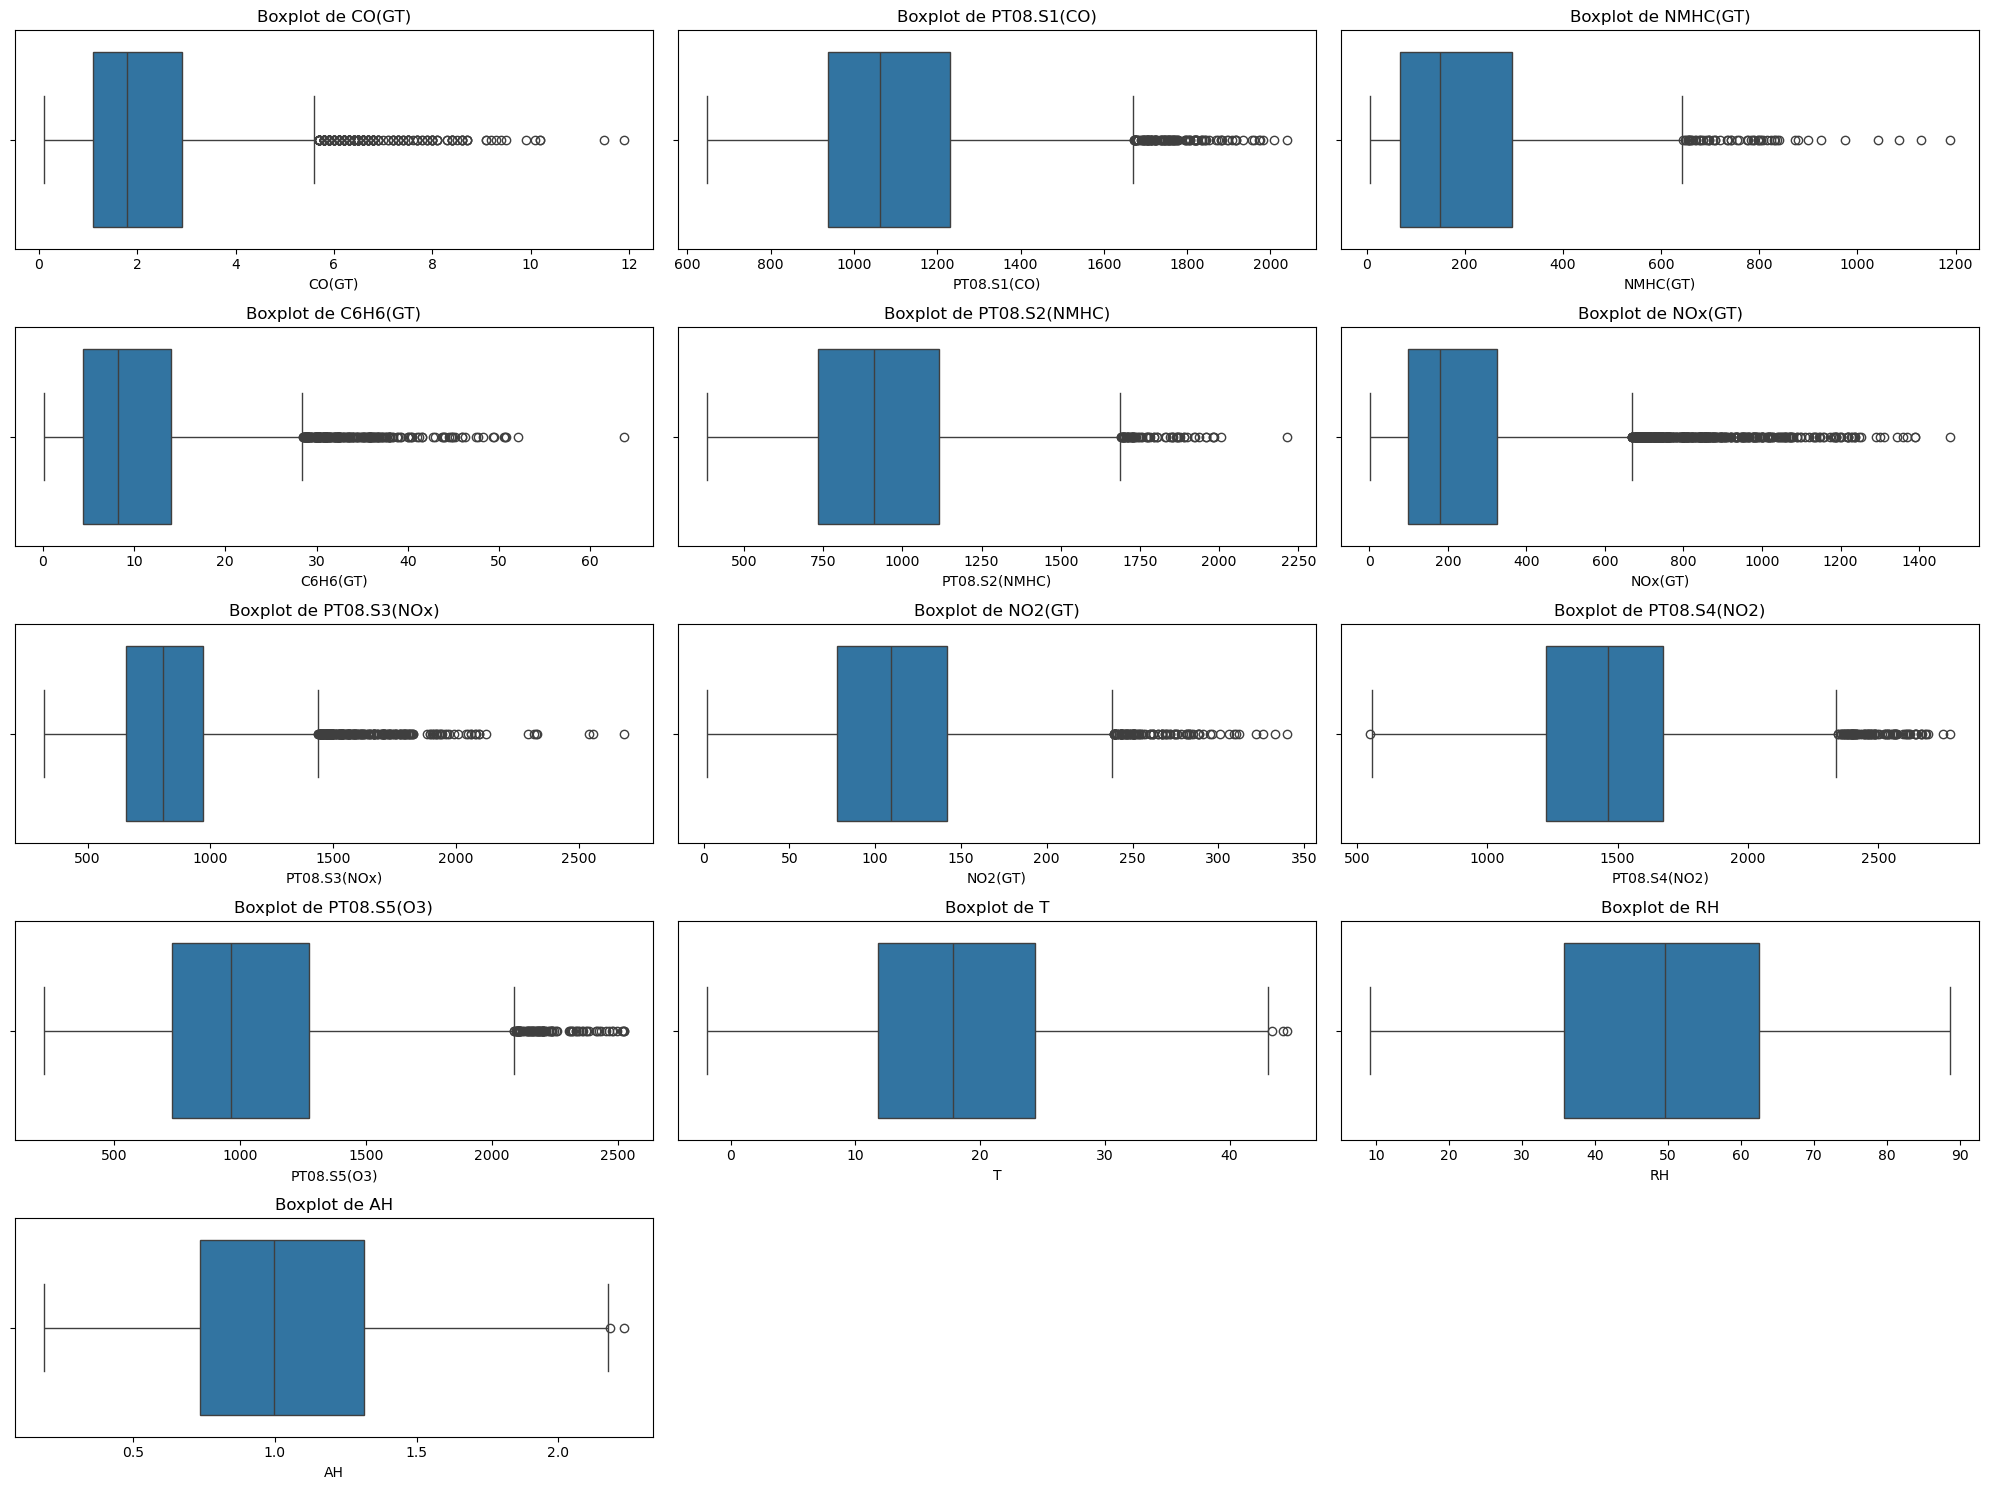

In [28]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

<p>Vemos que obtenemos muchos outliers en nuestras columnas continuas, esto nos está provocando que las distribuciones se nos desplacen hacia la izquierda. En algunas ocasiones, lo correcto para estos valores sería eliminarlos o imputarlos por algún valor (aunque esto pueda provocar algún sesgo), pero en nuestro caso esos valores pueden ser muy determinantes para predecir la calidad del aire, ya que si un valor es muy alto y está relacionado directamente con la variable objetivo, puede ser que eliminarlo no sea lo más correcto posible.</p>

In [29]:
# Definir una función para eliminar outliers usando el método IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Eliminar outliers de las columnas continuas
df_sin_outliers = remove_outliers(df, continuous_columns)

# Guardar el nuevo dataset en un archivo CSV
df_sin_outliers.to_csv('AirQualityUCI_sin_outliers.csv', sep=';', index=False)

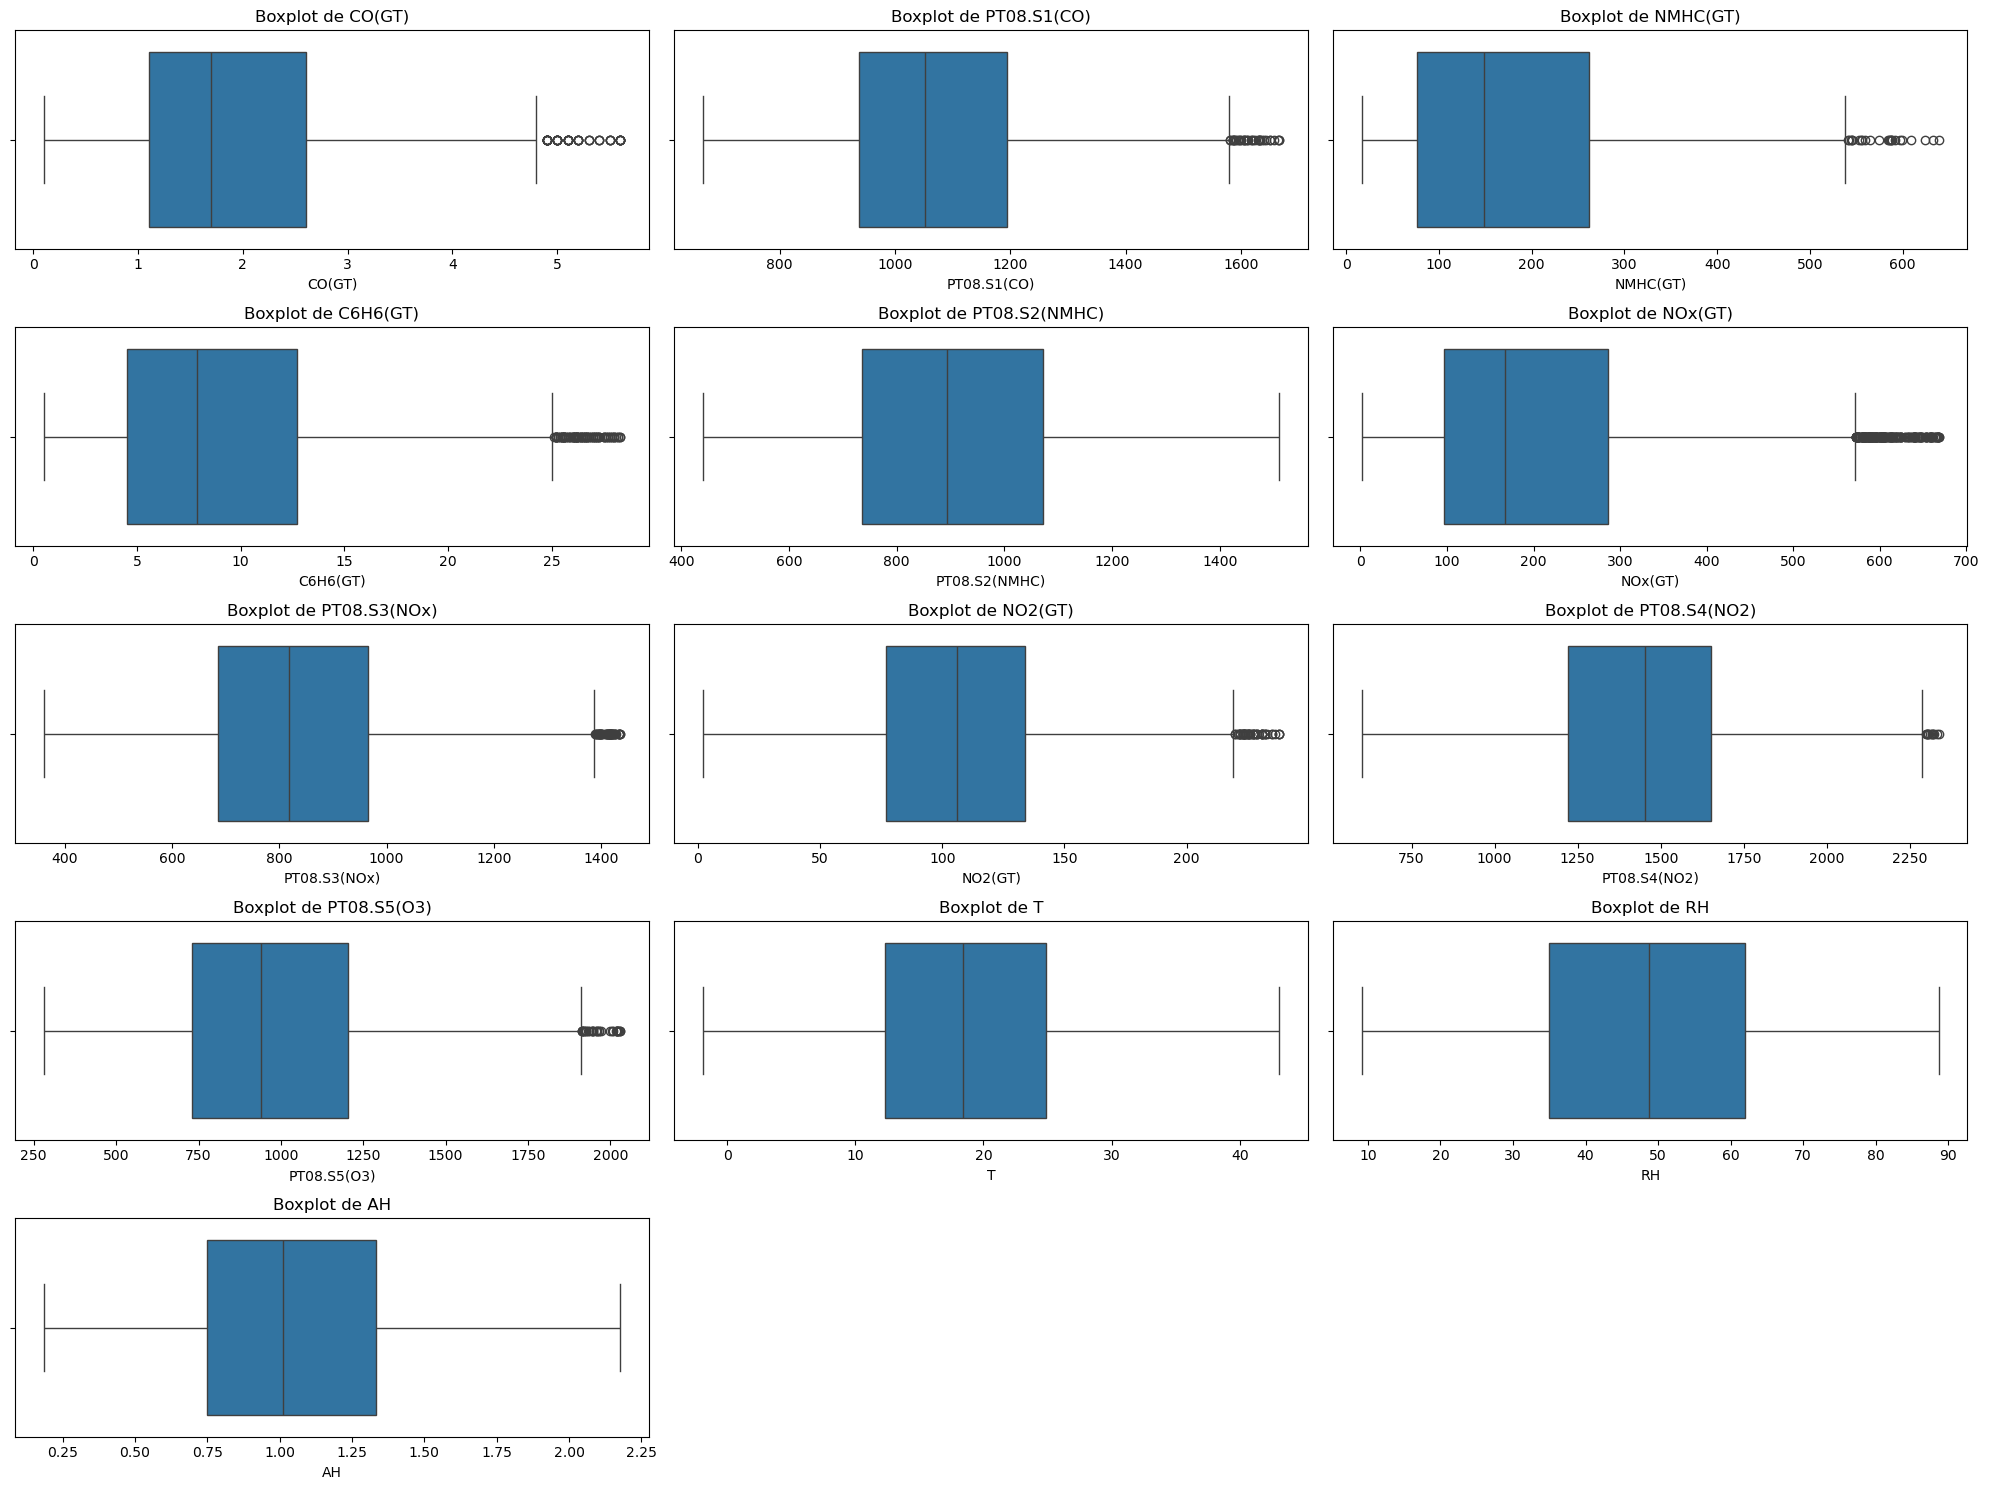

In [30]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_sin_outliers[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

RESPUESTA AQUÍ

In [31]:
## ¿cómo son las correlaciones entre las variables del dataset?

<h3>Generaremos estas soluciones con respecto al dataset sin eliminar los outliers, esta sección está idéntica en el anexo pero para el dataset sin outliers.</h3>

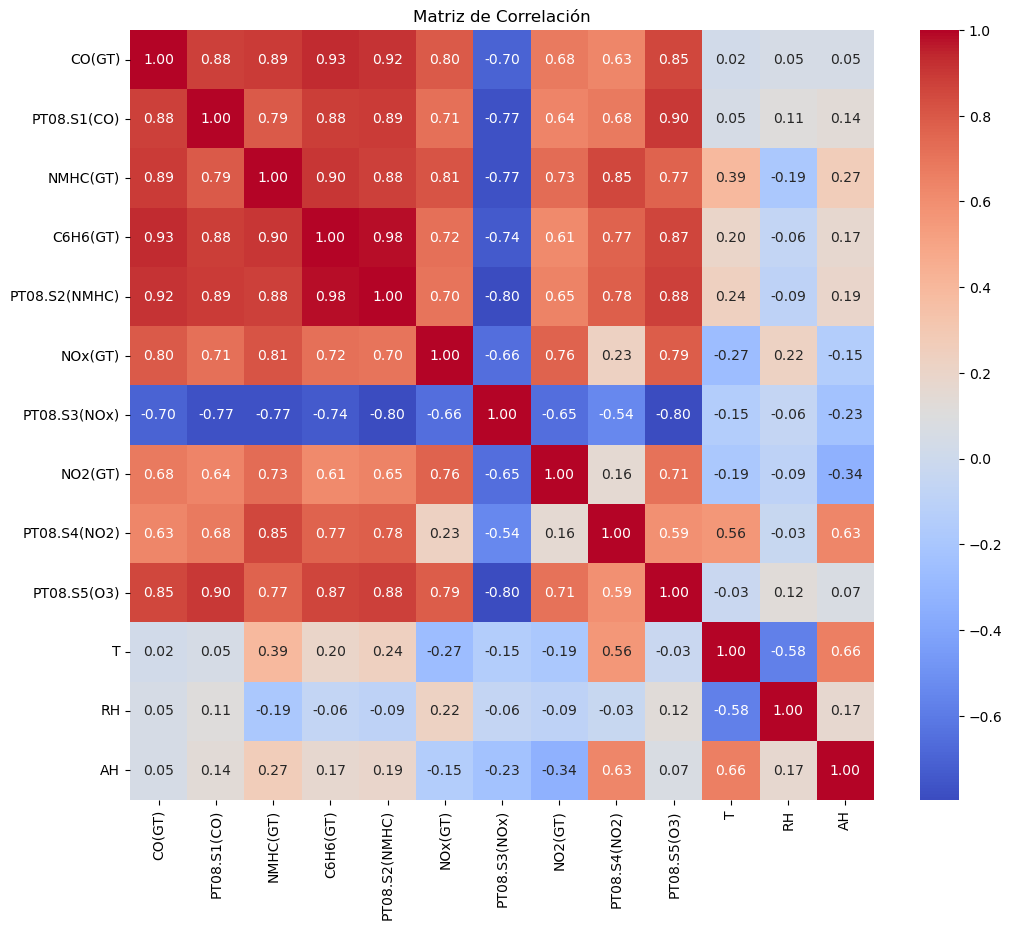

In [32]:
# Eliminar las columnas "Date" y "Time" del dataframe
df_corr = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear el gráfico de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [33]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

<p>"NOx(GT)", "NMHC(GT)" y "PT08.S5(O3)" son las 3 variables más relacionadas con nuestra variable objetivo "NO2(GT). Están ordenadas de más relación a menos. Esta relación tiene un valor entre -1 y 1. Siendo un 1 perfectamente relacionadas, un 0 nada de relación y un -1 inversamente relacionadas. En este caso, estas variables tienen una relación de 0.76, 0.73 y 0.71 respectivamente. Esto nos dice que tienen una relación bastente fuerte, por lo que pueden ser muy útiles para nuestros modelos para predecir el valor de nuestra variable objetivo. También observamos que hay otras variables que aunque tengan menor relación, también son algo altas, aunque sea inversamente relacionadas, como por ejemplo "PT08.S3(NOx).</p>

In [34]:
## ¿existe alguna variable que no tenga correlación?

<p>Nuestra variable objetivo apenas tiene relación con las variables "RH" y "PT08.S4(NO2). Esta última puede ser debido a que es un indicador de la respuesta del sensor que toma los datos de NO2. La primera es la humedad, por tanto, podemos deducir que la humedad no sirve mucho para predecir la variable objetivo. </p>

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

<p>Los datos que hemos obtenido son bastante prometedores para poder hacer una buena predicción de la calidad del aire. En nuestro caso, tendremos que predecir una variable numérica continua. Hay variables que están relacionadas con la objetivo, por lo que muy posiblemente obtendremos convergencia en el modelo de manera sencilla y esperamos buenos resultados en cuanto a métricas de accuraccy o similares. En nuestro caso, no nos quedaremos sólo ahí, sino que veremos también la posibilidad de analizar otras variables como nuestra variable objetivo o aplicar otros métodos más adecuados para nuestros datos, como puede ser el clustering, pero eso lo veremos en el anexo.</p>

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [35]:
# separar datos de entrenamiento y test

In [36]:
# Crear un dataset más pequeño con las columnas 'NOx(GT)' y 'NO2(GT)'
df_small = df[['NOx(GT)', 'NO2(GT)']]

# Eliminar las filas con valores NaN
df_small = df_small.dropna()

# Mostrar las primeras filas del nuevo dataset
df_small.head()

,NOx(GT),NO2(GT)
0,166.0,113.0
1,103.0,92.0
2,131.0,114.0
3,172.0,122.0
4,131.0,116.0


In [37]:
X = df_small[['NOx(GT)']]
y = df_small[['NO2(GT)']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entrenamiento: (6172, 1)
Tamaño del conjunto de prueba: (1543, 1)


In [39]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame


scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train))
X_test = DataFrame(scaler.fit_transform(X_test))

In [40]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [41]:
# Hecho en los pasos anteriores, se ha seleccionado la variable "NOx(GT)"

In [42]:
# entrena el modelo con los datos de entrenamiento

In [43]:
# Crear una instancia del modelo de regresión lineal
linear_model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = linear_model.predict(X_test)

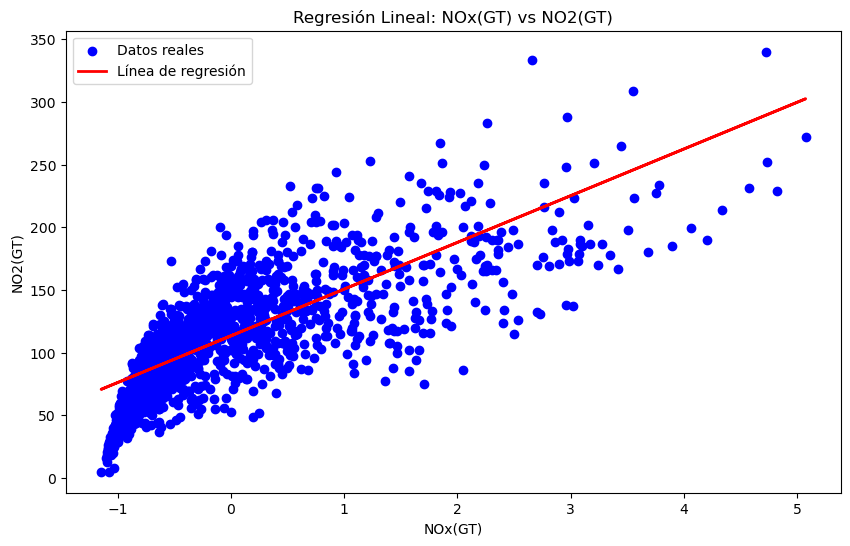

In [45]:
# Representar la línea de regresión y los puntos del dataset
plt.figure(figsize=(10, 6))

# Dibujar los puntos del dataset
plt.scatter(X_test, y_test, color='blue', label='Datos reales')

# Dibujar la línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')

plt.xlabel('NOx(GT)')
plt.ylabel('NO2(GT)')
plt.title('Regresión Lineal: NOx(GT) vs NO2(GT)')
plt.legend()
plt.show()

In [46]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [47]:
coef = linear_model.coef_
intercept = linear_model.intercept_

print(f'Coeficiente: {coef}')
print(f'Intercepto: {intercept}')

Coeficiente: [[37.26472733]]
Intercepto: [113.39063513]


Explica qué indican estos parámetros

<p>El coeficiente es el peso que el entrenamiento ha dado a cada una de las variables predictoras. Como estamos haciendo una regresión lineal, este parámetro indica la inclinación de nuestra línea de regresión. En este caso, indica la influencia que tiene esa característica en la decisión final de la predicción. Por otro lado, el intercepto (intercept) es el valor por donde cruza la línea de regresión lineal el eje Y. Es decir, es el valor que toma la predicción cuando las variables predictoras con cero.</p>
<br>
<p>En la representación de nuestra regresión lineal (y=ax+b) donde y es la predicción y x la variable predictora, a es el valor del coeficiente y b es el valor del intercepto. </p>

In [48]:
# realiza las predicciones para el conjunto de datos de test

In [49]:
# Realizar las predicciones para el conjunto de datos de test
y_pred = linear_model.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred[:10])

[[114.24363912]
 [ 86.35073492]
 [174.1683946 ]
 [104.70606543]
 [155.63310987]
 [104.88601965]
 [ 80.77215408]
 [ 95.34844596]
 [113.52382224]
 [119.64226574]]


In [50]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

<p>Para la regresión lineal, tenemos varias métricas que son las más adecuadas. Usaremos varias en este caso: error cuadrático medio (MSE), raiz del error cuadrático medio (RMSE), error absoluto medio (MAE), r-squared (R2) y error logarítmico cuadrático medio (RMSLE). Esta métricas en general nos permiten tener una amplia visión del comportamiento de nuestro modelo. </p>

In [51]:
# ¿Qué error tiene el modelo? Explícalo.

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2', 'RMSLE'],
    'Value': [mse, rmse, mae, r2, rmsle]
})

# Mostrar la tabla de métricas
metrics_df.head()

,Metric,Value
0,MSE,932.942726
1,RMSE,30.544111
2,MAE,23.995921
3,R2,0.572573
4,RMSLE,0.323672


<h3>Interpretación de los resultados</h3>
<ul>
<li>MSE -> nos indica que hay una variación algo alta. </li>
<li>RMSE -> nos indica que el error que hemos obtenido es aproximadamente de unas 30.54 unidades, teniendo un error moderado considerando los valores que se obtienen del dataset original.</li>
<li>MAE -> la desviación del modelo es de unas 23.99 unidades, indicando que estamos algo cerca del valor esperado y real, pero tenemos algo de margen de mejora. </li>
<li>R2 -> indica que tenemos un 57% de variabilidad. Tiene mucho margen de mejora.</li>
<li>RMSLE -> es algo bajo, pero no tan cerca de cero como se espera, por lo que también se puede mejorar.</li>
</ul>

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [53]:
# Eliminar las columnas "Date" y "Time" del dataframe
df = df.drop(columns=['Date', 'Time'])

# Mostrar las primeras filas del nuevo dataframe
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [54]:
# Comprobar la cantidad de valores nulos en cada columna del dataset
for column in df.columns:
    num_nulls = df[column].isnull().sum()
    print(f'{column}: {num_nulls} valores nulos')
valores_nulos = df.isnull().sum()

CO(GT): 1683 valores nulos
PT08.S1(CO): 366 valores nulos
NMHC(GT): 8443 valores nulos
C6H6(GT): 366 valores nulos
PT08.S2(NMHC): 366 valores nulos
NOx(GT): 1639 valores nulos
PT08.S3(NOx): 366 valores nulos
NO2(GT): 1642 valores nulos
PT08.S4(NO2): 366 valores nulos
PT08.S5(O3): 366 valores nulos
T: 366 valores nulos
RH: 366 valores nulos
AH: 366 valores nulos


In [55]:
df = df.dropna(subset=['NO2(GT)', 'CO(GT)', 'C6H6(GT)'])
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [56]:
for column in df.columns:
    num_nulls = df[column].isnull().sum()
    print(f'{column}: {num_nulls} valores nulos')
valores_nulos = df.isnull().sum()

CO(GT): 0 valores nulos
PT08.S1(CO): 0 valores nulos
NMHC(GT): 6114 valores nulos
C6H6(GT): 0 valores nulos
PT08.S2(NMHC): 0 valores nulos
NOx(GT): 0 valores nulos
PT08.S3(NOx): 0 valores nulos
NO2(GT): 0 valores nulos
PT08.S4(NO2): 0 valores nulos
PT08.S5(O3): 0 valores nulos
T: 0 valores nulos
RH: 0 valores nulos
AH: 0 valores nulos


In [57]:
df = df.drop(columns=['NMHC(GT)'])

In [58]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['NO2(GT)'])
y = df[['NO2(GT)']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
# Crear una instancia del modelo de regresión lineal
linear_model_multivariable = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model_multivariable.fit(X_train, y_train)

LinearRegression()

In [61]:
# Realizar las predicciones para el conjunto de datos de prueba
y_pred_multivariable = linear_model_multivariable.predict(X_test)

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

In [62]:
# Evaluar el modelo
mse_multivariable = mean_squared_error(y_test, y_pred_multivariable)
rmse_multivariable = np.sqrt(mse_multivariable)
mae_multivariable = mean_absolute_error(y_test, y_pred_multivariable)
r2_multivariable = r2_score(y_test, y_pred_multivariable)

# Mostrar las métricas de evaluación
metrics_multivariable_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_multivariable, rmse_multivariable, mae_multivariable, r2_multivariable]
})

metrics_multivariable_df.head()

,Metric,Value
0,MSE,494.572095
1,RMSE,22.238977
2,MAE,16.405940
3,R2,0.767724


<p>Este modelo multivariable mejora bastante con respecto al anterior, principalmente, la métrica que más se utiliza para regresión para medir la calidad del modelo es R2. Vemos como en el anteior obtuvimos un R2 de 57.26% (0.5726), lo que nos indica que hay ese porcentaje de varibilidad en el modelo. Cuanto mayor sea, indica que el modelo tienen una alta precisión para ajustarse a los datos (esta métrica es muy útil también para el overfitin). En nuestro primer caso, al estar en torno al 50% nos indica que no es muy alto y no tiene muy buenos resultados el modelo. Sin embargo, en el análisis multivarible, se obtiene un R2 del 76.77%, lo que indica una gran mejoría en el modelo. Lo ideal sería obtener un R2 cercano al 95, que serían unos resultados casi perfectos. Tenemos mejoría con respecto al análisis de un solo predictor. ¿Por qué no llegamos a números más altos? Esto pricipalmente se debe a dos factores: al seleccionar el NO2 como variable objetivo, hay muchos valores que no se han tomado correctamente (los valores -200 que se tratan en el EDA), por tanto, reducimos en gran cantidad el número de entradas de nuestro dataset que nos son útiles para el entrenamiento; por otro lado, tenemos que no hay una grandísima correlación con el resto de variables, lo que al final, repercute también en el resultado. Esto no sucede, como hemos hecho en el anexo, cuando usamos el benzeno como variable objetivo. En este caso, al tener un mayor número de entradas del dataset con valores óptimos y habiendo mayor correlación con otras variables, obtenemos unos resultados mayores al 95%. En esta sección, también estudiaremos el posible sobreajuste que puede tener este modelo usando como objetivo el benzeno.</p>

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

<h1>Indica qué son cada uno de estos hiperparámetros</h1>

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [63]:
tree_model = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='sqrt', random_state=42)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [64]:
# Realizar las predicciones para el conjunto de datos de prueba
y_pred_tree = tree_model.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred_tree[:10])

[166.          80.08571429 181.5        145.27272727 145.27272727
 124.66666667 155.48888889 101.30645161  70.57142857  51.86206897]


Calcula MAE, R2 y RMSLE

In [65]:
# Calcular MAE, R2 y RMSLE para el modelo de árbol de decisión
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmsle_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_tree))

# Mostrar las métricas de evaluación
metrics_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Value': [mae_tree, r2_tree, rmsle_tree]
})

metrics_tree_df.head()

,Metric,Value
0,MAE,15.288562
1,R2,0.782399
2,RMSLE,0.205749


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [66]:
# Calcular las métricas para el conjunto de entrenamiento
y_train_pred_tree = tree_model.predict(X_train)

mae_train_tree = mean_absolute_error(y_train, y_train_pred_tree)
r2_train_tree = r2_score(y_train, y_train_pred_tree)
rmsle_train_tree = np.sqrt(mean_squared_log_error(y_train, y_train_pred_tree))

# Mostrar las métricas de evaluación para el conjunto de entrenamiento
metrics_train_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Train Value': [mae_train_tree, r2_train_tree, rmsle_train_tree],
    'Test Value': [mae_tree, r2_tree, rmsle_tree]
})

metrics_train_tree_df.head()

,Metric,Train Value,Test Value
0,MAE,10.039326,15.288562
1,R2,0.916696,0.782399
2,RMSLE,0.130681,0.205749


<p>Primero, vamos a observar la diferencia que hay en el MAE. Esta diferencia indica algo que esperábamos, ya que es normal que el modelo ajuste mejor sobre el conjunto de entrenamiento que sobre el de test, por tanto, este pequeño aumento es esperado, lo que nos puede indicar que puede haber overfiting al obtener mejores resultados en el conjunto de entrenamiento que el de test. Por otro lado, apenas hay variación en el coeficiente de determinación R2, lo que nos da indicios claros de que no hay overfiting. Por tanto, las sospechas que podríamos tener con la métrica anterior, se nos desvanecen al analizar esta métrica. Por último, vemos una ligera diferencia en el error logarítmico cuadrático medio (RMSLE), pero es de apenas 0.03, este aumento se produce por el mismo motivo que en el MAE y es totalmente esperado, al ser tan pequeño, podemos concluir que no hay overfiting. Por tanto, podemos observar que nuestro modelo no poduce overfiting. </p>

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

<p> Este modelo obtiene muchos mejores resultados que los dos casos de regresión lineal. Podemos observar que las métricas son mucho mejores y casi que perfectas para este caso, además de que no tenemos overfiting y lo hacemos bien con el conjunto de test. Por tanto, los árboles han resultado ser un mejor modelo para predecir nuestra variable objetivo. </p>

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

<p>Como bien hemos dicho anteriormente, para nuestra variable objetivo NO2 y sin tener overfiting en el modelo, el que mejor hace la regresión es el árbol de búsqueda. Esto lo podemos ver en que obtenemos para el conjunto de test un 96.43% de R2, que es la métrica por excelencia para la regresión. Además que el resto de métricas están muy cerca de la perfección o de los valores óptimos que se esperan de un buen modelo, cuando en las regresiones que hemos realizado estaban un poco más alejado del óptimo. </p>

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

<h3>RESPUESTA:</h3><p>Puente Ramírez, N. P., Torres-Treviño, L. M., & Sánchez-Cantú, J. E.. (2015). Modelado computacional usando regresión lineal y simbólica α β para determinar ópticamente el tamaño del poro de la piel. Nova scientia, 7(14), 218-235. Recuperado en 06 de enero de 2025, de http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-07052015000200218&lng=es&tlng=es.</p>

<p>
TITULO: Modelado computacional usando regresión lineal y simbólica α β para determinar ópticamente el tamaño del poro de la piel. <br>
AUTORES: Puente Ramírez, N. P., Torres-Treviño, L. M., & Sánchez-Cantú, J. E.. <br>
REVISTA: Nova Scientia. <br>
AÑO DE PUBLICACIÓN: 2015.<br>
OBJETIVO: El objetivo es la creación de un método no invasivo para medir el tamaño de los poros de la piel. Esto lo hace relacionándolo con la edad, género y tono del piel. El propósito es identificar indicadores que puedan reflejar enfermedades como diabetes u obesidad. En cuanto a las técnicas usadas, se aplica la regresión lineal y simbólica α β junto con la optimización por enjambre de partículas (PSO). Los resultdos obtienen una explicabilidad del 88.9% (R2 = 0.8891). También se concluye con que la edad y el tono de piel tienen un impacto positivo en el tamaño de los poros, mientras que el género no lo hace. 
</p>

<h1>ANEXO</h1>

<h2>Estudio de la matriz de correlación para el dataset sin outliers</h2>

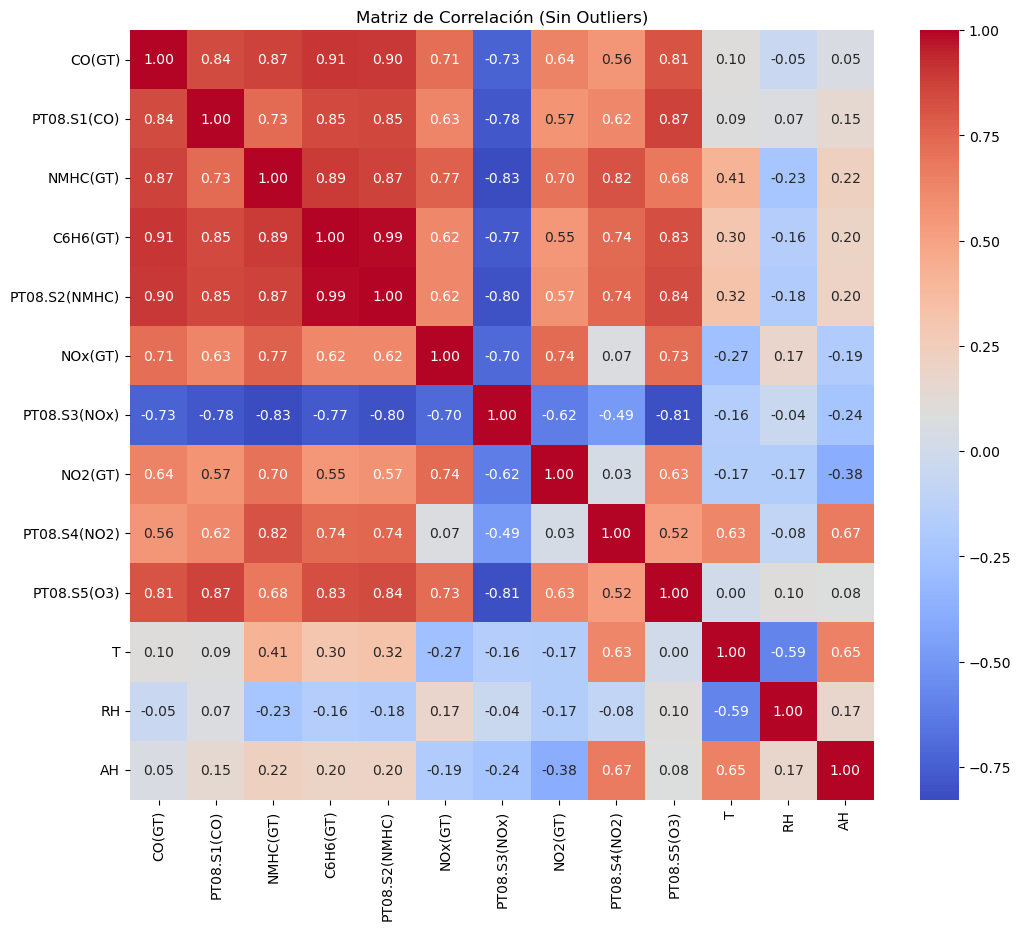

In [67]:
# Leer el dataset sin outliers
df_sin_outliers = pd.read_csv('AirQualityUCI_sin_outliers.csv', sep=';')

# Eliminar las columnas "Date" y "Time"
df_sin_outliers = df_sin_outliers.drop(columns=['Date', 'Time'])

# Calcular la matriz de correlación
correlation_matrix_sin_outliers = df_sin_outliers.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_sin_outliers, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación (Sin Outliers)')
plt.show()

<p>Podemos observar que es una matriz de correlación muy similar a la que hemos obtenido con el dataset con outliers, por lo que no obtendríamos resultados demasiado diferentes entre hacer ML con otliers o sin otliers, aunque estos últimos pueden ser determinantes a la hora de entrenar.</p>

<h2>IMPUTAR LOS VALORES NULOS POR LA MEDIANA, MOSTRAR LAS DISTRIBUCIONES OBTENIDAS Y LA MATRIZ DE RELACIÓN</h2>

In [68]:
# Hacer una copia del dataset
df_copy = df.copy()

# Reemplazar los valores nulos por la mediana de cada columna, excepto "Date" y "Time"
for col in df_copy.columns:
    if col not in ['Date', 'Time']:
        median_value = df_copy[col].median()
        df_copy[col].fillna(median_value, inplace=True)

# Verificar que no hay valores nulos en las columnas excepto "Date" y "Time"
print(df_copy.isnull().sum())

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


/var/folders/tz/jj92p2gs4ssdc6dvqg1ybjz80000gn/T/ipykernel_5288/3167653611.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(median_value, inplace=True)


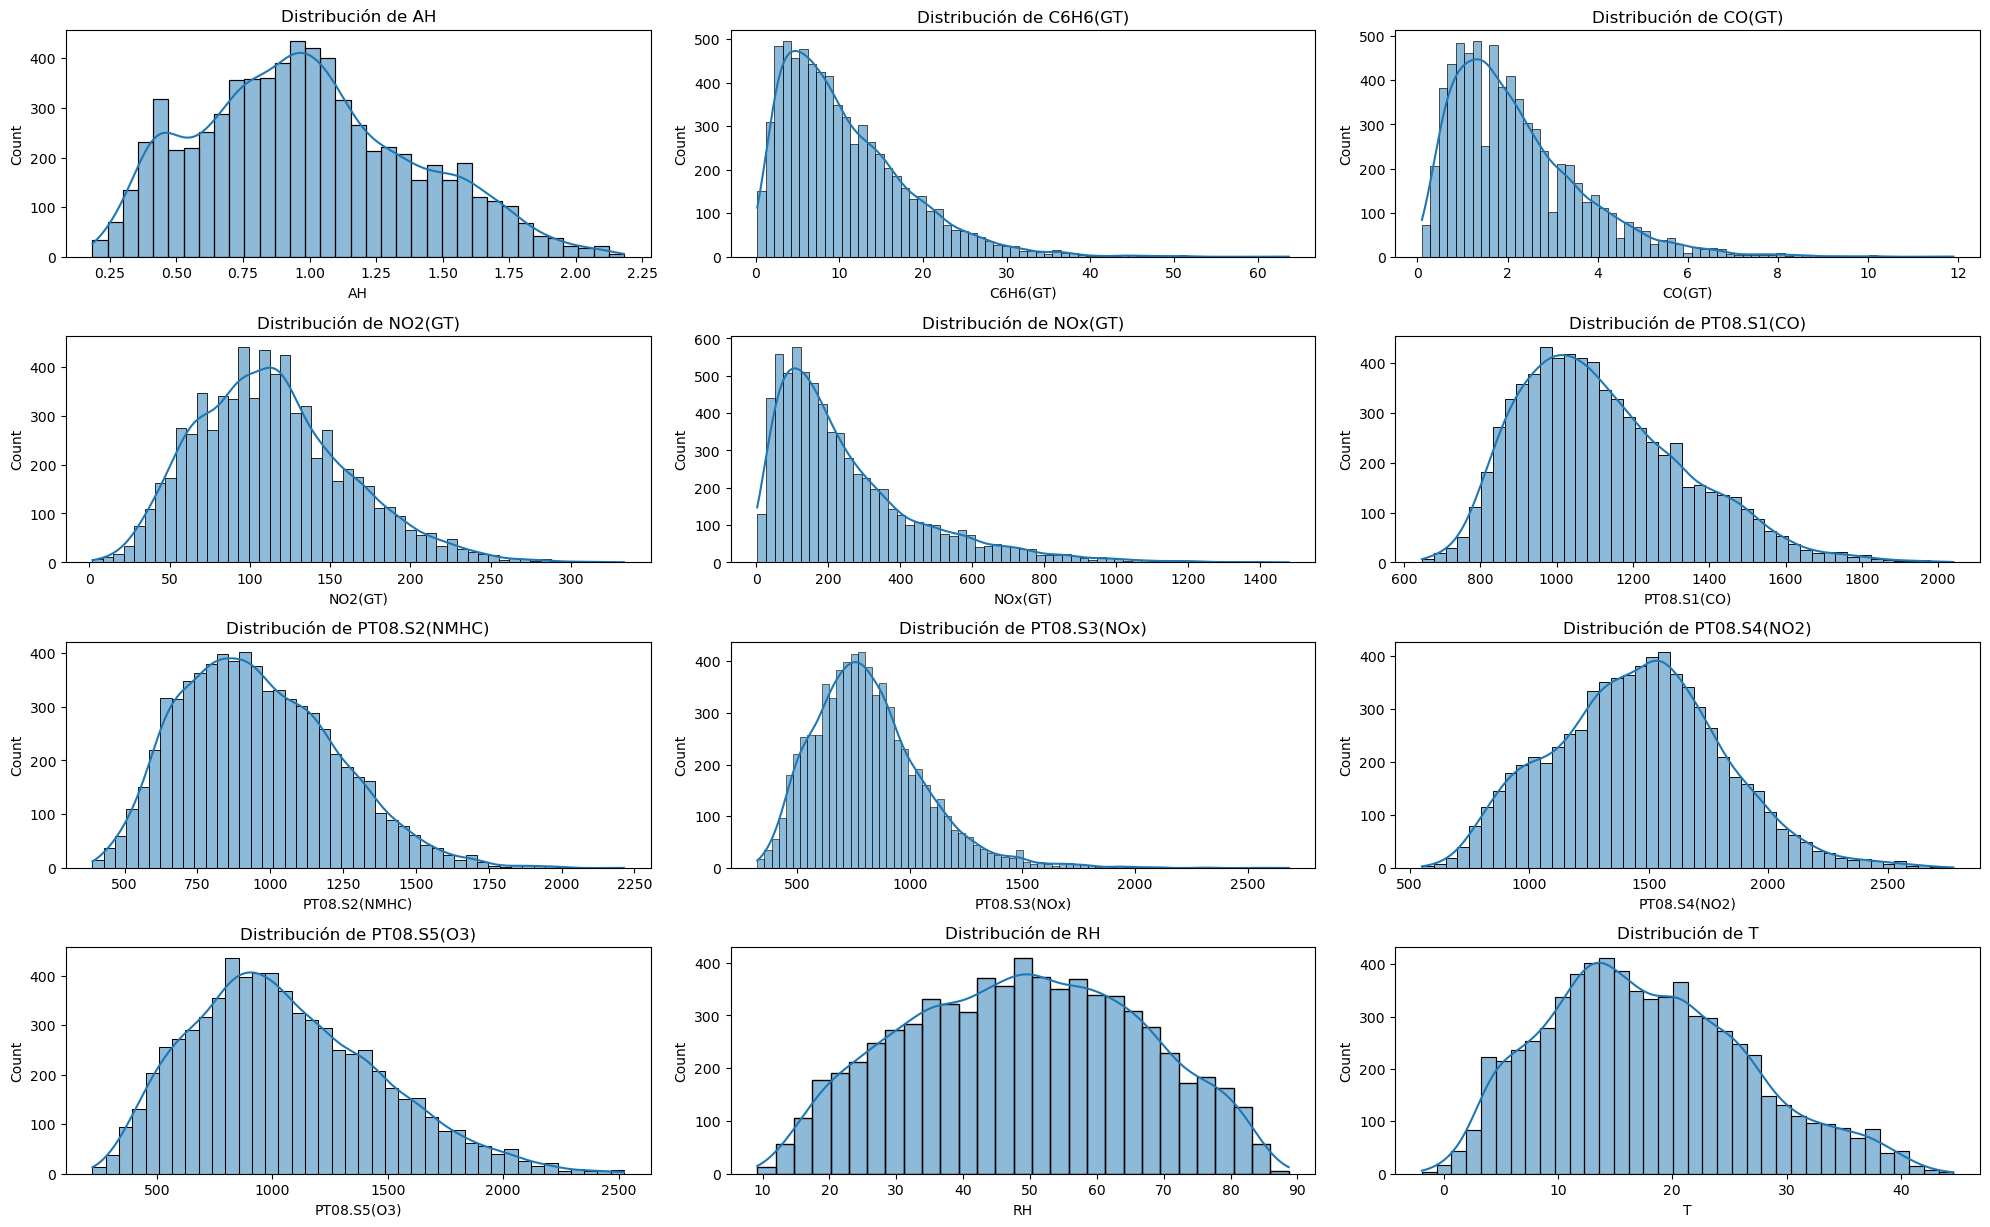

In [69]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_copy.columns.difference(['Date', 'Time']), 1):
    plt.subplot(5, 3, i)
    sns.histplot(df_copy[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

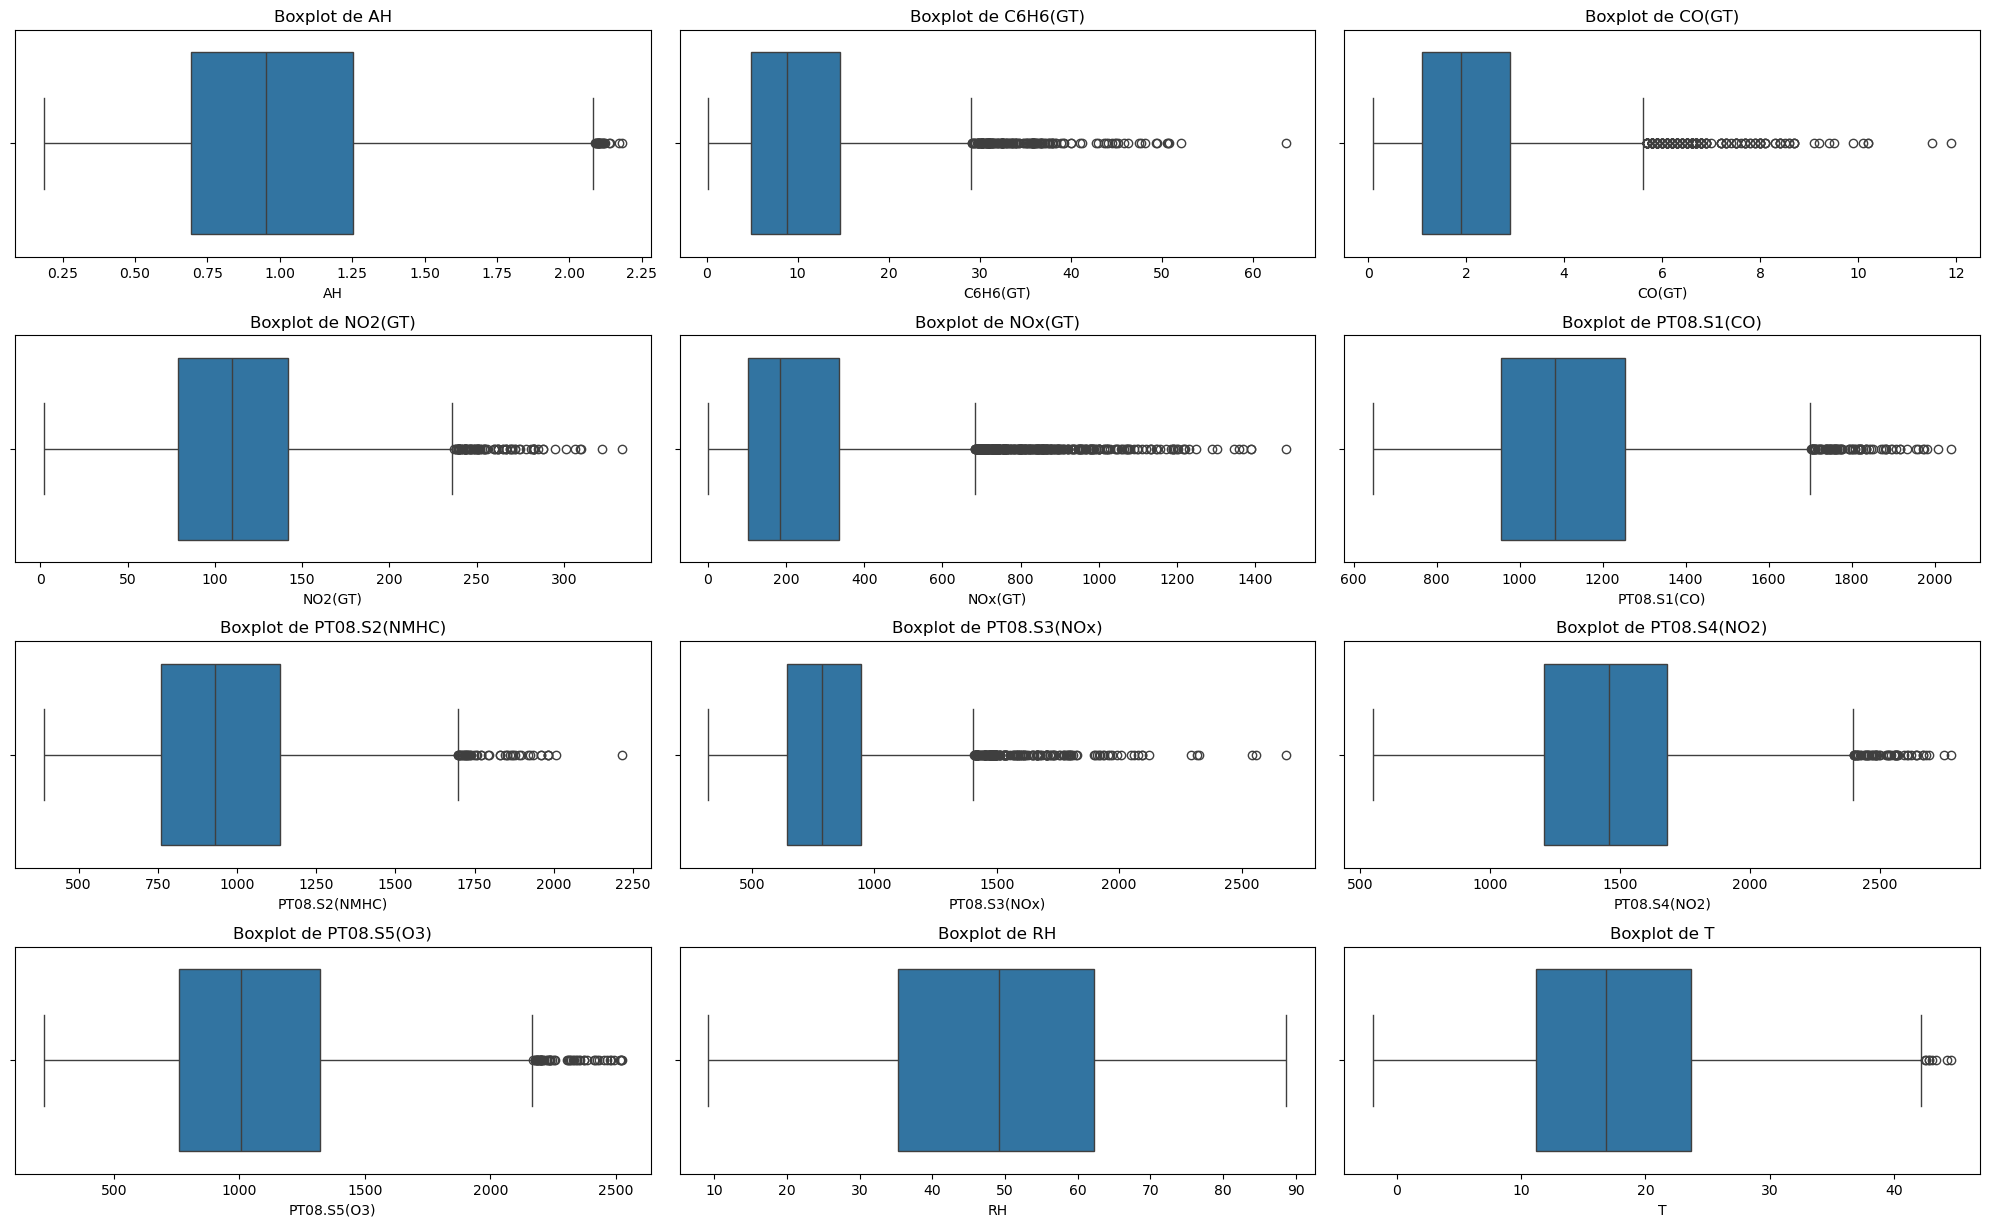

In [70]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_copy.columns.difference(['Date', 'Time']), 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df_copy[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

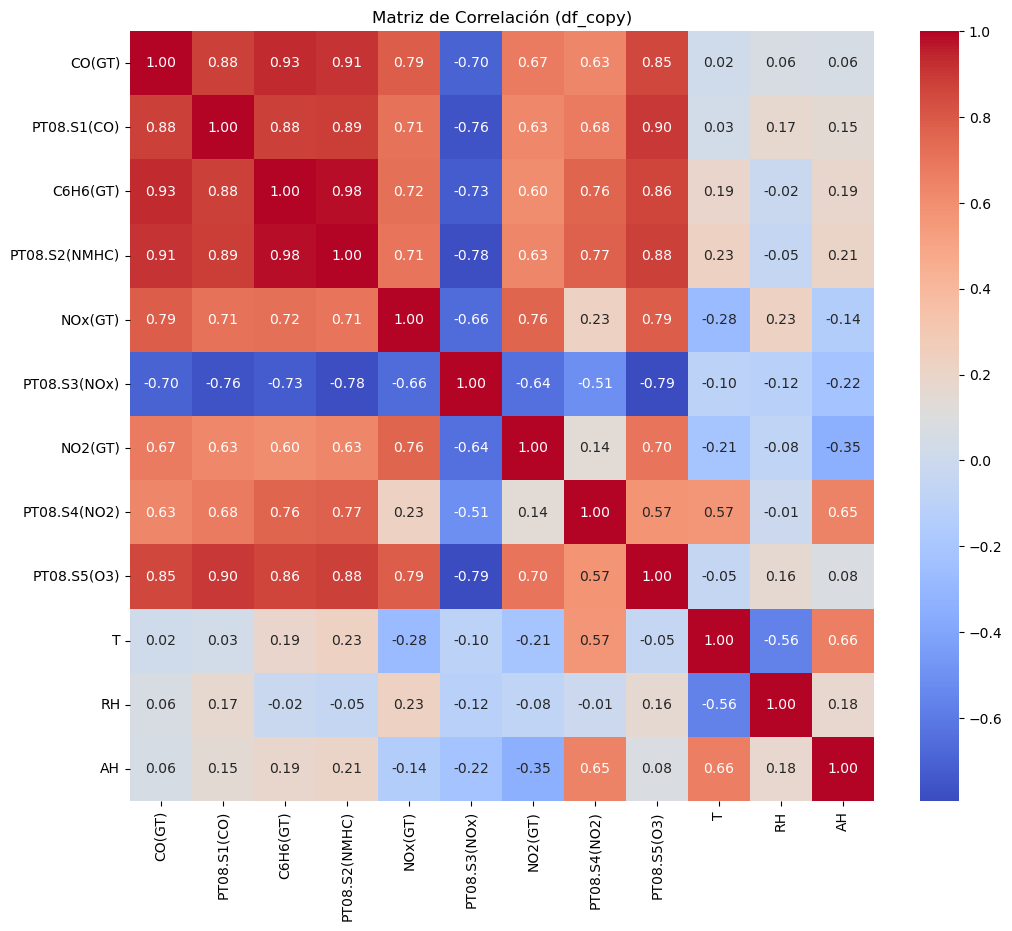

In [71]:
# Calcular la matriz de correlación del dataset df_copy
correlation_matrix_copy = df_copy.select_dtypes(include=[np.number]).corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_copy, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación (df_copy)')
plt.show()

<h1>REGRESIÓN MULTIVARIABLE CON EL BENCENO COMO VARIABLE OBJETIVO</h1>

In [72]:
# Leer el dataset
df_bencenos = pd.read_csv('AirQualityUCI_procesado_nan.csv', sep=';')

df_bencenos = df_bencenos.drop(columns=['Date', 'Time'])

# Eliminar filas con valores NaN en la columna objetivo 'C6H6(GT)'
df_bencenos = df_bencenos.dropna(subset=['C6H6(GT)'])

In [73]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bencenos.drop(columns=['C6H6(GT)'])
y = df_bencenos[['C6H6(GT)']]

In [74]:
# Manejar los valores NaN en las variables predictoras
X = X.fillna(X.median())

In [75]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Crear una instancia del modelo de regresión lineal
linear_model_benceno = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
linear_model_benceno.fit(X_train, y_train)

LinearRegression()

In [77]:
# Realizar las predicciones para el conjunto de datos de prueba
y_pred_benceno = linear_model_benceno.predict(X_test)

In [78]:
# Evaluar el modelo
mse_benceno = mean_squared_error(y_test, y_pred_benceno)
rmse_benceno = np.sqrt(mse_benceno)
mae_benceno = mean_absolute_error(y_test, y_pred_benceno)
r2_benceno = r2_score(y_test, y_pred_benceno)

# Mostrar las métricas de evaluación
metrics_benceno_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R2'],
    'Value': [mse_benceno, rmse_benceno, mae_benceno, r2_benceno]
})

metrics_benceno_df.head()

,Metric,Value
0,MSE,1.354370
1,RMSE,1.163774
2,MAE,0.845934
3,R2,0.976430


<h1>ÁRBOL DE BÚSQUEDA CON EL BENCENO COMO VARIABLE OBJETIVO. </h1> 

In [79]:
# Guardar el dataset limpio en una variable llamada df_bencenos
df_bencenos = pd.read_csv('AirQualityUCI_procesado_nan.csv', sep=';')

# Eliminar las columnas "Date" y "Time"
df_bencenos = df_bencenos.drop(columns=['Date', 'Time'])

# Eliminar filas con valores NaN en la columna objetivo 'C6H6(GT)'
df_bencenos = df_bencenos.dropna(subset=['C6H6(GT)'])

In [80]:
# Manejar los valores NaN en las variables predictoras
df_bencenos = df_bencenos.fillna(df_bencenos.median())

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_bencenos.drop(columns=['C6H6(GT)'])
y = df_bencenos[['C6H6(GT)']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# Crear una instancia del modelo de árbol de decisión
tree_model_benceno = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2, max_features='sqrt')

# Entrenar el modelo con los datos de entrenamiento
tree_model_benceno.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=10)

In [82]:
# Realizar las predicciones para el conjunto de datos de prueba
y_pred_benceno_tree = tree_model_benceno.predict(X_test)

In [83]:
# Calcular MAE, R2 y RMSLE para el modelo de árbol de decisión
mae_benceno_tree = mean_absolute_error(y_test, y_pred_benceno_tree)
r2_benceno_tree = r2_score(y_test, y_pred_benceno_tree)
rmsle_benceno_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_benceno_tree))

# Mostrar las métricas de evaluación
metrics_benceno_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Value': [mae_benceno_tree, r2_benceno_tree, rmsle_benceno_tree]
})

metrics_benceno_tree_df.head()

,Metric,Value
0,MAE,0.852399
1,R2,0.964244
2,RMSLE,0.131633


In [84]:
# Calcular las métricas para el conjunto de entrenamiento
y_train_pred_benceno_tree = tree_model_benceno.predict(X_train)

mae_train_benceno_tree = mean_absolute_error(y_train, y_train_pred_benceno_tree)
r2_train_benceno_tree = r2_score(y_train, y_train_pred_benceno_tree)
rmsle_train_benceno_tree = np.sqrt(mean_squared_log_error(y_train, y_train_pred_benceno_tree))

# Mostrar las métricas de evaluación para el conjunto de entrenamiento
metrics_train_benceno_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Train Value': [mae_train_benceno_tree, r2_train_benceno_tree, rmsle_train_benceno_tree],
    'Test Value': [mae_benceno_tree, r2_benceno_tree, rmsle_benceno_tree]
})

metrics_train_benceno_tree_df.head()

,Metric,Train Value,Test Value
0,MAE,0.608980,0.852399
1,R2,0.982382,0.964244
2,RMSLE,0.110269,0.131633


<h1>HIPERPARAMETRIZACIÓN DEL ÁRBOL DE BÚSQUEDA</h1>

In [85]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que queremos probar en el GridSearch
param_grid = {
    'criterion': ['poisson', 'squared_error', 'friedman_mse', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Crear una instancia del modelo de árbol de decisión
tree_model = DecisionTreeRegressor()

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Entrenar el GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

/opt/anaconda3/envs/actividad1_TAA/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/actividad1_TAA/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/actividad1_TAA/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/actividad1_TAA/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_param

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'squared_error',
                                       'friedman_mse', 'absolute_error'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [86]:
# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f'Mejores hiperparámetros: {best_params}')

Mejores hiperparámetros: {'criterion': 'poisson', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [87]:
# Entrenar el modelo con los mejores hiperparámetros
best_tree_model = grid_search.best_estimator_

# Realizar las predicciones para el conjunto de datos de prueba
y_pred_best_tree = best_tree_model.predict(X_test)

# Calcular las métricas de evaluación
mae_best_tree = mean_absolute_error(y_test, y_pred_best_tree)
r2_best_tree = r2_score(y_test, y_pred_best_tree)
rmsle_best_tree = np.sqrt(mean_squared_log_error(y_test, y_pred_best_tree))

# Mostrar las métricas de evaluación
metrics_best_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Value': [mae_best_tree, r2_best_tree, rmsle_best_tree]
})

metrics_best_tree_df.head()

,Metric,Value
0,MAE,0.014239
1,R2,0.999921
2,RMSLE,0.003929


In [88]:
# Calcular las métricas para el conjunto de entrenamiento
y_train_pred_best_tree = best_tree_model.predict(X_train)

mae_train_best_tree = mean_absolute_error(y_train, y_train_pred_best_tree)
r2_train_best_tree = r2_score(y_train, y_train_pred_best_tree)
rmsle_train_best_tree = np.sqrt(mean_squared_log_error(y_train, y_train_pred_best_tree))

# Mostrar las métricas de evaluación para el conjunto de entrenamiento y prueba
metrics_train_best_tree_df = pd.DataFrame({
    'Metric': ['MAE', 'R2', 'RMSLE'],
    'Train Value': [mae_train_best_tree, r2_train_best_tree, rmsle_train_best_tree],
    'Test Value': [mae_best_tree, r2_best_tree, rmsle_best_tree]
})

metrics_train_best_tree_df.head()

,Metric,Train Value,Test Value
0,MAE,0.006143,0.014239
1,R2,0.999823,0.999921
2,RMSLE,0.002422,0.003929


<h1>ANÁLISIS EXTRA CON OTROS MODELOS.</h1>

<p>Una muy buena aproximación para este caso puede ser el usar técnicas de clustering. Quizá lo más correcto sería esto, pudiendo agrupar cada entrada del dataset en una categoría que serían las categorías de calidad del aire, que pueden ser varias. Para adivinar el número de clases que mejor agrupa a nuestro conjunto de datos usarmeos técnicas como la del codo o silhouette. En este caso, estamos pasando más de un problema de regresión a un problema de clasificación, pero el dataset es muy adecuado para realizar con él una clasificación. Ya no queremos saber el valor de una variable objetivo, sino que sabiendo los datos que se han tomado en un día concreto, vamos a ser capaces de predecir la calidad del aire para ese momento en concreto. </p>

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

file_path = 'AirQualityUCI_procesado_nan.csv'
df = pd.read_csv(file_path, sep=';')


In [90]:
df = df.drop(columns=['Date', 'Time'])
df = df.fillna(df.median())

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

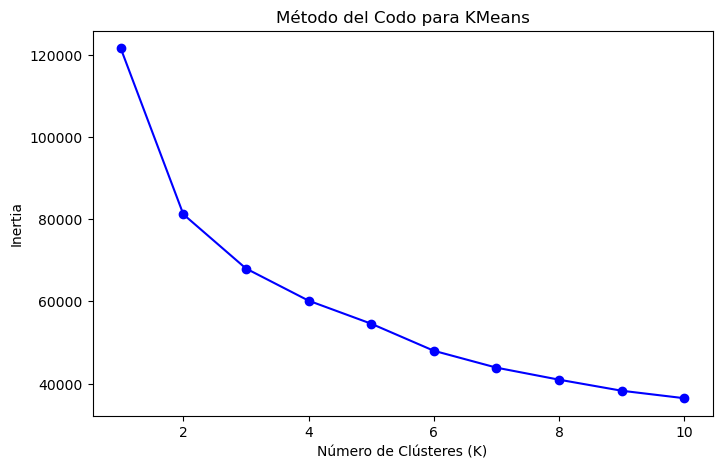

In [92]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inertia')
plt.title('Método del Codo para KMeans')
plt.show()

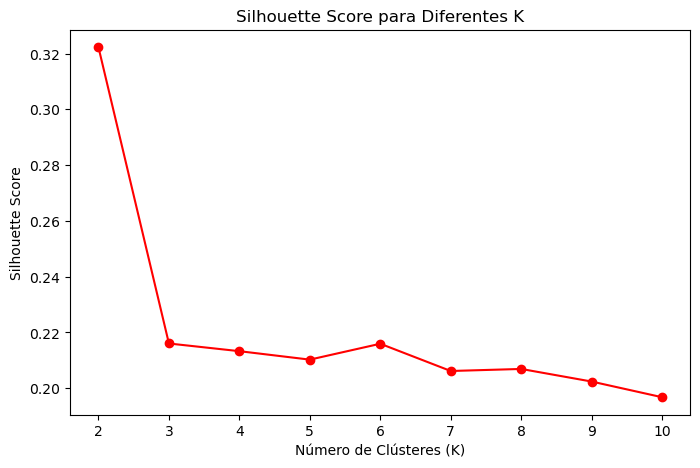

In [93]:
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

# Visualización del Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette, 'ro-')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes K')
plt.show()

<p>Usaremos 4 clusters</p>

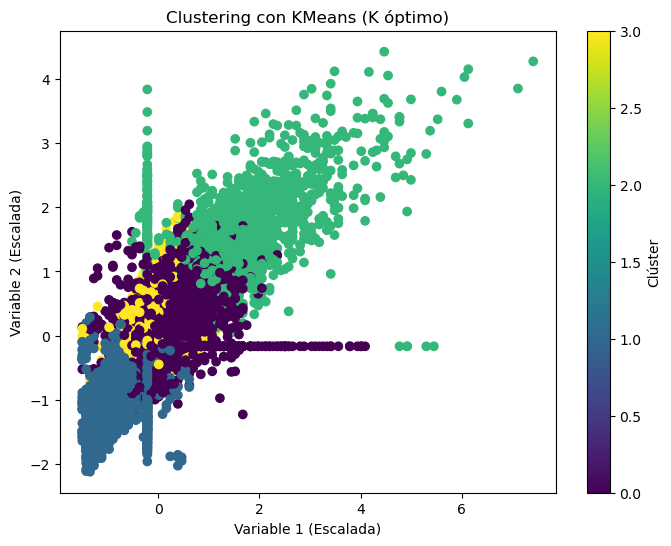

           CO(GT)  PT08.S1(CO)    NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Cluster                                                                
0        2.368967  1134.697661  153.123788   9.413748     946.707359   
1        1.068546   897.268917  138.304896   3.326224     660.735534   
2        4.099055  1440.421285  198.924433  22.454723    1354.117758   
3        1.809247  1078.947892  153.390361   9.798343     959.446386   

            NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
Cluster                                                                    
0        357.641187    722.187108  150.549914   1244.834569  1150.377638   
1        120.264466   1112.559347   81.392804   1168.864985   653.394659   
2        475.041562    552.201511  151.333123   1876.610202  1625.113350   
3        149.103916    802.581024   98.738253   1600.970181   961.012952   

                 T         RH        AH  
Cluster                                  
0        11.235482  53.614

In [94]:
# Aplicar KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualización de los clústeres
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Variable 1 (Escalada)')
plt.ylabel('Variable 2 (Escalada)')
plt.title('Clustering con KMeans (K óptimo)')
plt.colorbar(label='Clúster')
plt.show()

# Mostrar la media de cada clúster
print(df.groupby('Cluster').mean())


<p>Haciendo un pequeño análisis de estos datos obtenido, observamos que, en escala de calidad del aire, los clusteres producidos se corresponden con las siguiente scalidades del aire: 
<br>
<li> Cluster 0: calidad del aire regular</li>
<li> Cluster 1: muy buena calidad del aire</li>
<li> Cluster 2: mala calidad del aire</li>
<li> Cluster 3: buena calidad del aire</li>
</br>